## Multi-dimensional Poverty Measures

Most of the countries, people understand poverty as lack of money. But a person who is poor can suffer from various other issues/grievances- *malnutrition, lack of education & job opportunity, lack of clean drinking-water & electricity etc*. So income cannot be the sole criteria for poverty. 

**MPI or Multidimensional Poverty Index** calculated by **Oxford Poverty & Human Development Initiative(OPHI)** which takes all the factors into consideration to calculate poverty level of an area.

In [ ]:
!ls

MPI_subnational.csv  sample_data


# Data Description

**Data Source:** https://www.kaggle.com/ophi/mpi

**Data Description:**

**ISO country code:** ISO 3166-1 alpha-3 Country code for each country.

**Country:** Name of country.

**Sub-national Region:** Region within country.

**World Region:** General global region.

**MPI National:** Overall aggregate national MPI score.

**MPI Regional:** Multi-dimensional poverty index for the region.

**MPI Regional:** Multi-dimensional poverty index for this region.

**Headcount Ratio Region:** % of population listed as poor in this region.

**Intensity of deprivation Regional:** Percentage of deprivations suffered by each person or household on average


# Exploratory Data Analysis- Data Visualization

In [ ]:
# Importing necessary libraries and data
import pandas as pd
import numpy as np
df=pd.read_csv('MPI_subnational.csv')

In [ ]:
df.head()

,ISO country code,Country,Sub-national region,World region,MPI National,MPI Regional,Headcount Ratio Regional,Intensity of deprivation Regional
0,AFG,Afghanistan,Badakhshan,South Asia,0.295,0.387,67.5,57.3
1,AFG,Afghanistan,Badghis,South Asia,0.295,0.466,79.3,58.8
2,AFG,Afghanistan,Baghlan,South Asia,0.295,0.300,59.7,50.3
3,AFG,Afghanistan,Balkh,South Asia,0.295,0.301,55.7,54.1
4,AFG,Afghanistan,Bamyan,South Asia,0.295,0.325,61.0,53.3


In [ ]:
df.isnull().sum()

ISO country code                     0
Country                              0
Sub-national region                  0
World region                         0
MPI National                         0
MPI Regional                         0
Headcount Ratio Regional             0
Intensity of deprivation Regional    1
dtype: int64

In [ ]:
# Filling the missing value with the mean value of the column
df['Intensity of deprivation Regional'].fillna(df['Intensity of deprivation Regional'].mean(),axis=0,inplace=True)

In [ ]:
# Calcuating the overall mean of all the sub-regions in a country
df1=df.groupby('Country')['MPI National'].mean().reset_index()

In [ ]:
df1.sort_values(by=['MPI National'],inplace=True,ascending=False)

In [ ]:
df1.iloc[:15]

,Country,MPI National
53,Niger,0.605
24,Ethiopia,0.564
62,South Sudan,0.557
12,Chad,0.552
7,Burkina Faso,0.535
61,Sierra Leone,0.464
29,Guinea,0.459
44,Mali,0.457
8,Burundi,0.454
11,Central African Republic,0.430


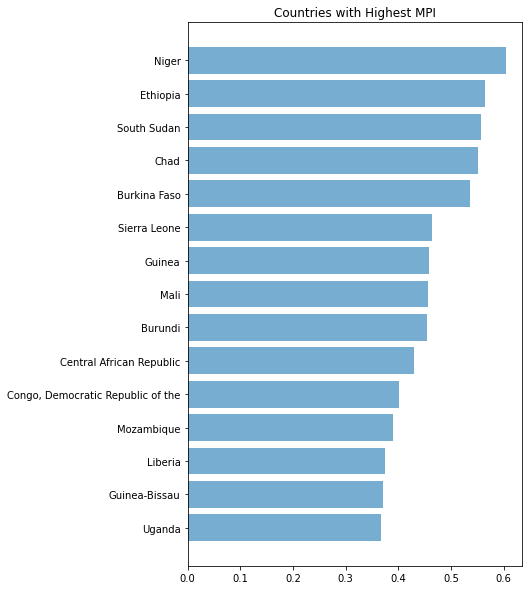

In [ ]:
# Plotting the Mean MPI countrywise(top 15)
import matplotlib.pyplot as plt
plt.figure(figsize=(6,10))
df2=df1.iloc[:15][::-1]
plt.barh(df2['Country'],df2['MPI National'],alpha=0.6)
title=plt.title('Countries with Highest MPI')

We can see that **Niger** has the **highest MPI** followed by others. Higher the MPI more intense the poverty is there in the country. So **Niger** is most troubled with poverty.

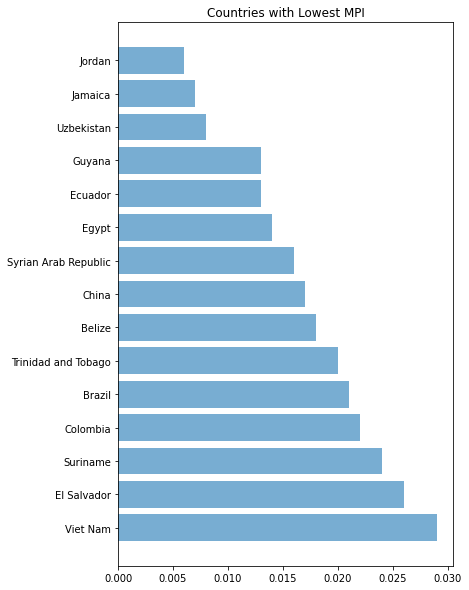

In [ ]:
# Plotting least Mean MPI country (top 15)
plt.figure(figsize=(6,10))
df2=df1.iloc[::-1][:15][::-1]
plt.barh(df2['Country'],df2['MPI National'],alpha=0.6)
title=plt.title('Countries with Lowest MPI')

**Jordan** has the **lowest MPI** so least troubled with poverty.

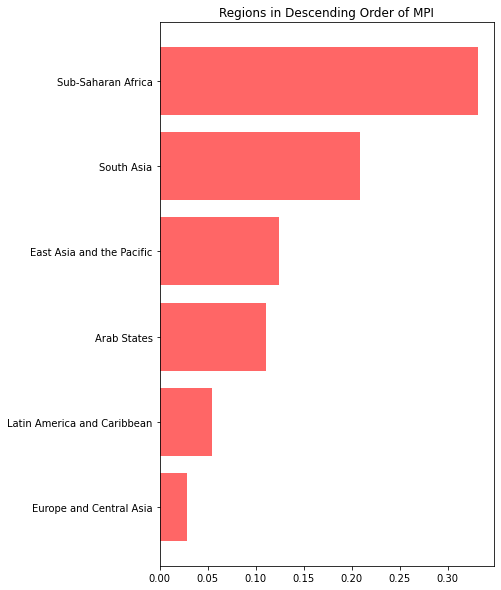

In [ ]:
# Visualizing Mean MPI value across World Regions
df3=df.groupby('World region')['MPI National'].mean().reset_index()
df3.sort_values(by='MPI National',ascending=False,inplace=True)
plt.figure(figsize=(6,10))
df4=df3[::-1]
plt.barh(df4['World region'],df4['MPI National'],alpha=0.6,color='red')
title=plt.title('Regions in Descending Order of MPI')

As we can see from above horizontal barplot, MPI measure for **Sub-Saharan Africa** region is highest so that region is facing most problem regarding poverty whereas **Europe and Central Asia** has least **MPI** measure so least poverty.

In [ ]:
df5=df.groupby(['Country','ISO country code'])['MPI National'].mean().reset_index()
df5

,Country,ISO country code,MPI National
0,Afghanistan,AFG,0.295
1,Bangladesh,BGD,0.196
2,Belize,BLZ,0.018
3,Benin,BEN,0.307
4,Bhutan,BTN,0.119
...,...,...,...
73,Uzbekistan,UZB,0.008
74,Viet Nam,VNM,0.029
75,Yemen,YEM,0.236
76,Zambia,ZMB,0.281


In [ ]:
# Plotting choropleth mapplot to visualize nationwise MPI value (MPI National)
import plotly.express as px
fig = px.choropleth(df5, locations="ISO country code",
                    color="MPI National", # lifeExp is a column of gapminder
                     # column to add to hover information
                    color_continuous_scale='Bluyl',width=1300)

fig.show()

The above **interactive choropleth mapplot** gives an idea of MPI for each country. The colorbar in right gives how large the MPI values for a country are. A choropleth mapplot here is a great tool for **comparative analysis** of MPI values between countries.

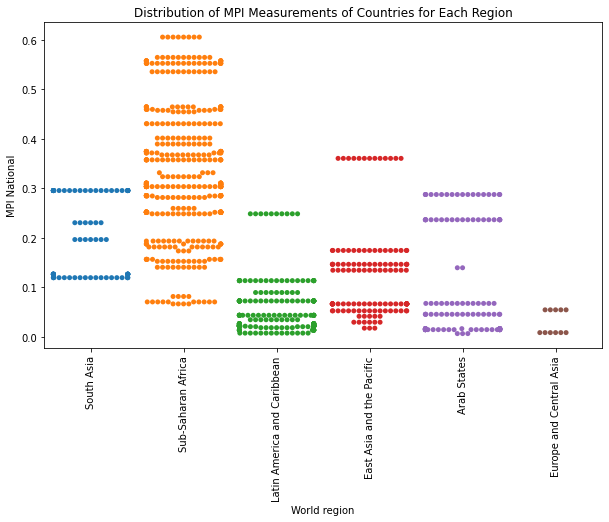

In [ ]:
# Plotting different values of MPI for each World Region
import seaborn as sns
plt.figure(figsize=(10,6))
sc=sns.swarmplot(x='World region',y='MPI National',data=df)
tick=plt.xticks(rotation=90)
title=plt.title('Distribution of MPI Measurements of Countries for Each Region')

In the above plot we could see what are the values, ranges of values and frequency of each value for each region. Similarly **Europe and Central Asia** has lowest range and variation in the MPI values.

For eg: **Sub-Saharan Africa** has the largest range of MPI values from approx 0.08 to 0.6 and more wide a particular strip of dots are more countries have that value.For eg: a large no. of countries in **Sub-Saharan region** has 0.3 MPI measures as there is a wide strip of dots present.

In [ ]:
# Counting number of observations corresponding to each world region
df['World region'].value_counts()

Sub-Saharan Africa             431
Latin America and Caribbean    218
East Asia and the Pacific      128
Arab States                    115
South Asia                      81
Europe and Central Asia         11
Name: World region, dtype: int64

# Statistical Data Analysis

The difference in means as visualized above can be due to random chance. To check if there is difference in mean between two distributions distributions. We will perform Statistical Test called **Hypothesis Testing** here. To test whether the distributions of two distributions have equal mean we will perform t-test here.

The assumption of t-test is that the two population/distribution has same variance, which can again be tested as Levene Test.

If two distributions have unqual variance then we will use Welch t-test instead.

**Levene Test:**

**H0(Null Hypothesis):** The two distributions have equal variance.
**HA(Alternate Hypothesis):** The two distributions have unequal variance.

**t-test(same for Welch T-test):**

**H0(Null Hypothesis):** The two distributions have equal mean.

**HA(Alternate Hypothesis):** The two distributions have unequal mean.

p-value is the probability that we observed our sample data given the null hypothesis is true.

p-value<0.05, we reject null hypothesis in favor of alternate hypothesis with 95% confidence level.

Note: t-test is a parametric test so assumes normal distribution of data. Since each of the world regions except **Europe and Central Asia** has large number of observations(>30) we expect normal distribution according to **Central Limit Theoram**. But the **Europe and Central Asia** has very few observations so we need to use the non-parametric statistical test.

In [ ]:
# Prepararing data for statistical test
l1=[]
l2=[]
reg=df['World region'].unique().tolist()
for i in range(len(reg)-1):
  for j in range(1,len(reg)-1):
    if i!=j:
     l1.append([i,j])
for i in l1:
  l2.append(sorted(i))
l2=np.array(l2)
new_array = [tuple(row) for row in l2]
new_array=list((set(new_array)))

In [ ]:
# Performing Levene Test and then based of the result we perform suitable t-test
import scipy.stats as stats
for i in range(len(new_array)):
  print(reg[new_array[i][0]],' & ',reg[new_array[i][1]])
  t_stat,p_val=stats.levene(df[df['World region']==reg[new_array[i][0]]]['MPI National'],df[df['World region']==reg[new_array[i][1]]]['MPI National'])
  print('Levene Test of Equal Variance p value %f' %(p_val))
  if p_val<0.05:
    t, p = stats.ttest_ind(df[df['World region']==reg[new_array[i][0]]]['MPI National'],df[df['World region']==reg[new_array[i][1]]]['MPI National'], equal_var = False)
    print('Welch\'s t-test p-value %f' %(p))
  else:
    t, p = stats.ttest_ind(df[df['World region']==reg[new_array[i][0]]]['MPI National'],df[df['World region']==reg[new_array[i][1]]]['MPI National'])
    print('t-test p-value %f' %(p))
  print('\n')

South Asia  &  Sub-Saharan Africa
Levene Test of Equal Variance p value 0.001493
Welch's t-test p-value 0.000000


Sub-Saharan Africa  &  Latin America and Caribbean
Levene Test of Equal Variance p value 0.000000
Welch's t-test p-value 0.000000


Sub-Saharan Africa  &  East Asia and the Pacific
Levene Test of Equal Variance p value 0.000013
Welch's t-test p-value 0.000000


Sub-Saharan Africa  &  Arab States
Levene Test of Equal Variance p value 0.062206
t-test p-value 0.000000


Latin America and Caribbean  &  Arab States
Levene Test of Equal Variance p value 0.000000
Welch's t-test p-value 0.000001


Latin America and Caribbean  &  East Asia and the Pacific
Levene Test of Equal Variance p value 0.000000
Welch's t-test p-value 0.000000


South Asia  &  Arab States
Levene Test of Equal Variance p value 0.217082
t-test p-value 0.000000


South Asia  &  East Asia and the Pacific
Levene Test of Equal Variance p value 0.493801
t-test p-value 0.000000


East Asia and the Pacific  &  Arab St

Notice that Null Hypothesis is rejected for all except for **East Asia** and the **Pacific  &  Arab States** with 95% significance level. So their means are different.

But for the above two countries we fail to reject the null hypotheis indicating their MPI value distributions are similar. This is a very important deduction.

We will test whether the distribution of MPI measures for countries of different World Regions have similar distribution with **Europe and Central Asia** or not. This will give us an idea that which world regions are facing similar poverty. **It is non-parametric alternative of t-test.**

We will perform Mann Whitney U Test here for this purpose.

**Null Hypothesis(H0):** Two independent samples have same distribution.

**Alternate Hypothesis(HA):** Two independent samples have different distributions.

p-value<0.05, we reject null hypothesis in favor of alternate hypothesis with 95% confidence level.

In [ ]:
for i in range(0,len(reg)-1):
  _,p_val=stats.mannwhitneyu(df[df['World region']==reg[i]]['MPI National'],df[df['World region']==reg[-1]]['MPI National'])
  print(reg[i],' & ',reg[-1])
  print(p_val)
  print('\n')

South Asia  &  Europe and Central Asia
1.5371822416276205e-08


Sub-Saharan Africa  &  Europe and Central Asia
7.153782520353207e-09


Latin America and Caribbean  &  Europe and Central Asia
0.02751613011538636


East Asia and the Pacific  &  Europe and Central Asia
7.551065750141044e-06


Arab States  &  Europe and Central Asia
0.0030447749753631874




Here also the  **null hypothesis is rejected** so the distribution of MPI values for countries of different world regions is different from that of **Europe and Central Asia** with **95% significance level**.

In [ ]:
df.columns

Index(['ISO country code', 'Country', 'Sub-national region', 'World region',
       'MPI National', 'MPI Regional', 'Headcount Ratio Regional',
       'Intensity of deprivation Regional'],
      dtype='object')

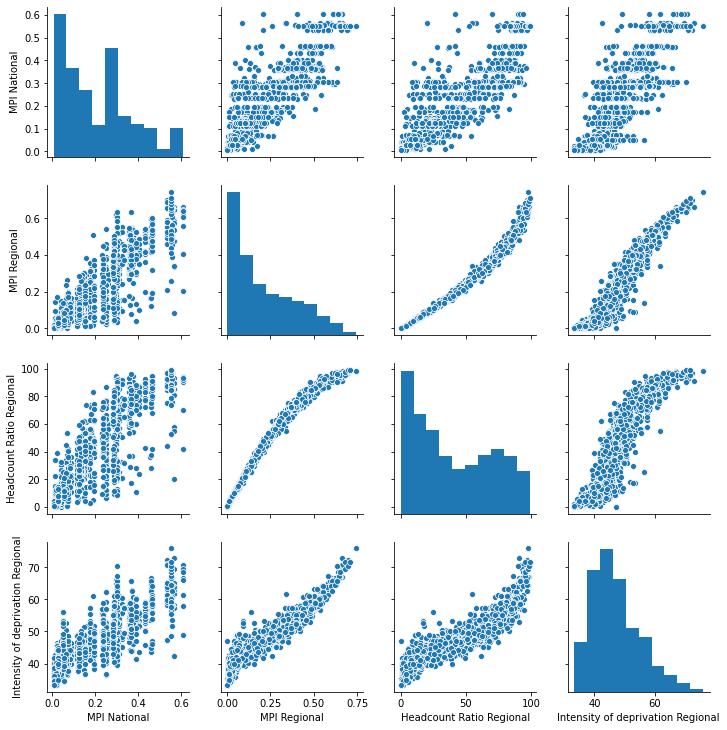

In [ ]:
# Observing the distribution of each numerical feature in the dataset and their relationship using pairplot
import seaborn as sns
sns.pairplot(df)

From thw above pairplot, first we look at the histograms. They clearly indicates that all the variables are **right skewed**. The scatterplot indicates there are strong correlation/relationship between features. Some relationships are more or less linear while others are non-linear. For eg: relationship between **MPI National and MPI Regional** seems more or less linear whereas that of **MPI Regional and Headcount Ratio Regional** is purely non-linear.

Visualizing relationship gives us an idea of how change of one feature affects other, thus giving us idea of impact of one feature over the other. Also relationship/correlation is to dealt carefully while building ML models like Linear Regression, Logistic Regression etc.

In [ ]:
# Now we will specifically look at correlation valuesamong features. We will use Spearman's Correlation to calculate correlation values as
# we observed that there are non-linear relationship present also.
corr=df.corr(method='spearman')
corr

,MPI National,MPI Regional,Headcount Ratio Regional,Intensity of deprivation Regional
MPI National,1.000000,0.874796,0.874778,0.813713
MPI Regional,0.874796,1.000000,0.998123,0.933375
Headcount Ratio Regional,0.874778,0.998123,1.000000,0.915276
Intensity of deprivation Regional,0.813713,0.933375,0.915276,1.000000


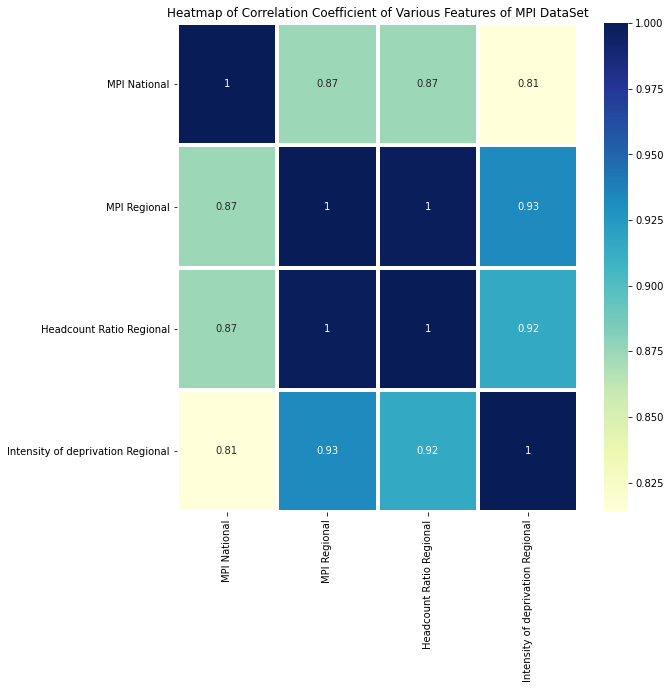

In [ ]:
# For better understanding of the correlation values we generate a heatmap
plt.figure(figsize=(9,9))
f=sns.heatmap(corr,cmap='YlGnBu',linewidths=3,annot=True)
title=plt.title('Heatmap of Correlation Coefficient of Various Features of MPI DataSet')

We can use statistical test to test whether the correlation between two features is significant. If both the variables have normal distribution and linear relationship we will use the **Pearson Rank Correlation Metrics** else **Spearman's Rank Correlation Metrics**. We can use *jointplot* to easily visualize the distribution of features.

**H0:** There is no statistically significant relationship between the variables.

**HA:** There is statistically significant relationship between two variables.

We can use jointplot to visualize both the relationship between two variables as well the distribution of individual variable.

So in one jointplot we can check the linear relationship(correlation) between two features using scatterplot as well as distribution of each feature using histogram.

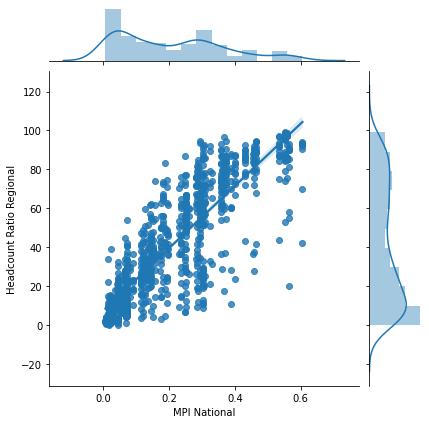

In [ ]:
import seaborn as sns
p1=sns.jointplot(data=df,x='MPI National',y='Headcount Ratio Regional',kind='reg')

In [ ]:
from scipy import stats
stats.spearmanr(df['MPI National'],df['Headcount Ratio Regional'])

SpearmanrResult(correlation=0.8747779290001263, pvalue=2.776011967214e-311)

**p-value** is less than 0.05 so we can say with **95% significance level** that there is high significant correlation of **0.87** between **MPI National** and **Headcount Ration Regional**.

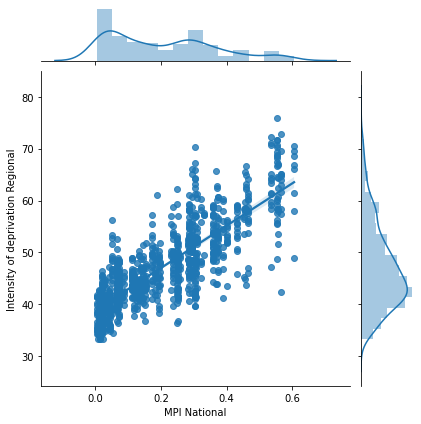

In [ ]:
import seaborn as sns
sns.jointplot(data=df,x='MPI National',y='Intensity of deprivation Regional',kind='reg')

In [ ]:
stats.spearmanr(df['MPI National'],df['Intensity of deprivation Regional'])

SpearmanrResult(correlation=0.8137130493599257, pvalue=1.2936719258737407e-233)

**p-value** is less than **0.05** so we can say with 95% significance level that there is high significant positive correlation of 0.81 between **MPI National** and **Intensity of deprivation Regional**.

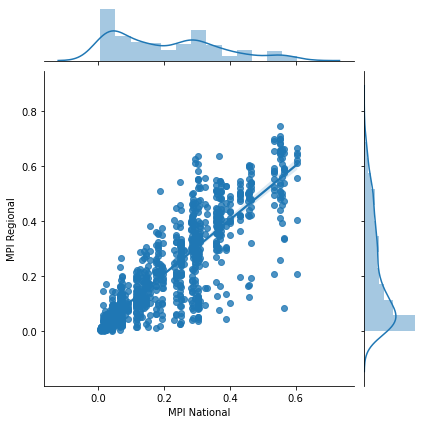

In [ ]:
sns.jointplot(data=df,x='MPI National',y='MPI Regional',kind='reg')

In [ ]:
stats.spearmanr(df['MPI National'],df['MPI Regional'])

SpearmanrResult(correlation=0.8747956184904959, pvalue=2.601952194629e-311)

Here also there is **statistically significant positive relationship** of **0.87** between **MPI National and MPI Regional**.

# Building Prediction with Machine Learning

Now in the description of dataset in the Kaggle page it is not given exactly what is the exact formula for calculating the **MPI National** for a country. So using **Machine Learning Algorithm** we will try to figure out which feature conributes the most towards predicting/determining **MPI National** for a country.

First we will start with basic Linear Regression Model for model-fitting. But Linear Regression is a very restrictive model and has a number of restrictions or conditions to be strictly fulfilled, to build the model correctly.

The assumptions include:

 1. The independent variables should have linear and additive relationhip with the dependent variable.

 2. The independent variables should not be correlated with each other. No multicollinearity should be there.

 3. The error terms should be normally distributed and have equal variance(homoscedastic). If non-equal variance is present then the property is called heteroscedasticity.

 4. There should be no autocorrelation among the error terms.

 5. The dependent variable should be normally distributed.



In [ ]:
df2=df.groupby(['Country','MPI National','World region'])['MPI Regional','Headcount Ratio Regional','Intensity of deprivation Regional'].mean().reset_index()
df2.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Country,MPI National,World region,MPI Regional,Headcount Ratio Regional,Intensity of deprivation Regional
0,Afghanistan,0.295,South Asia,0.309853,58.600000,51.908824
1,Bangladesh,0.196,South Asia,0.208286,43.814286,47.214286
2,Belize,0.018,Latin America and Caribbean,0.020143,5.057143,39.028571
3,Benin,0.307,Sub-Saharan Africa,0.320333,64.783333,48.550000
4,Bhutan,0.119,South Asia,0.123474,28.478947,42.673684


In [ ]:
# We cannot use text in Machine Learning Model, we need numerical features so we will create dummy variables from categorical column World Region
dumm=pd.get_dummies(df2['World region'])
df2=pd.concat([df2,dumm],axis=1)
df2.drop('World region',axis=1,inplace=True)
df3=df2.copy()

In [ ]:
df2=df2.select_dtypes(include=['float','uint8'])
df2.head()

,MPI National,MPI Regional,Headcount Ratio Regional,Intensity of deprivation Regional,Arab States,East Asia and the Pacific,Europe and Central Asia,Latin America and Caribbean,South Asia,Sub-Saharan Africa
0,0.295,0.309853,58.600000,51.908824,0,0,0,0,1,0
1,0.196,0.208286,43.814286,47.214286,0,0,0,0,1,0
2,0.018,0.020143,5.057143,39.028571,0,0,0,1,0,0
3,0.307,0.320333,64.783333,48.550000,0,0,0,0,0,1
4,0.119,0.123474,28.478947,42.673684,0,0,0,0,1,0


In [ ]:
# We normalize the features of the dataframe because unscaled features may bias the result
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
mod=(std.fit_transform(df2))


df2['MPI Regional']=mod[:,1]
df2['Headcount Ratio Regional']=mod[:,2]
df2['Intensity of deprivation Regional']=mod[:,3]

df2.head()

,MPI National,MPI Regional,Headcount Ratio Regional,Intensity of deprivation Regional,Arab States,East Asia and the Pacific,Europe and Central Asia,Latin America and Caribbean,South Asia,Sub-Saharan Africa
0,0.295,0.607220,0.688291,0.683486,0,0,0,0,1,0
1,0.196,-0.016461,0.140253,0.027613,0,0,0,0,1,0
2,0.018,-1.171768,-1.296295,-1.116013,0,0,0,1,0,0
3,0.307,0.671576,0.917478,0.214225,0,0,0,0,0,1
4,0.119,-0.537257,-0.428157,-0.606754,0,0,0,0,1,0


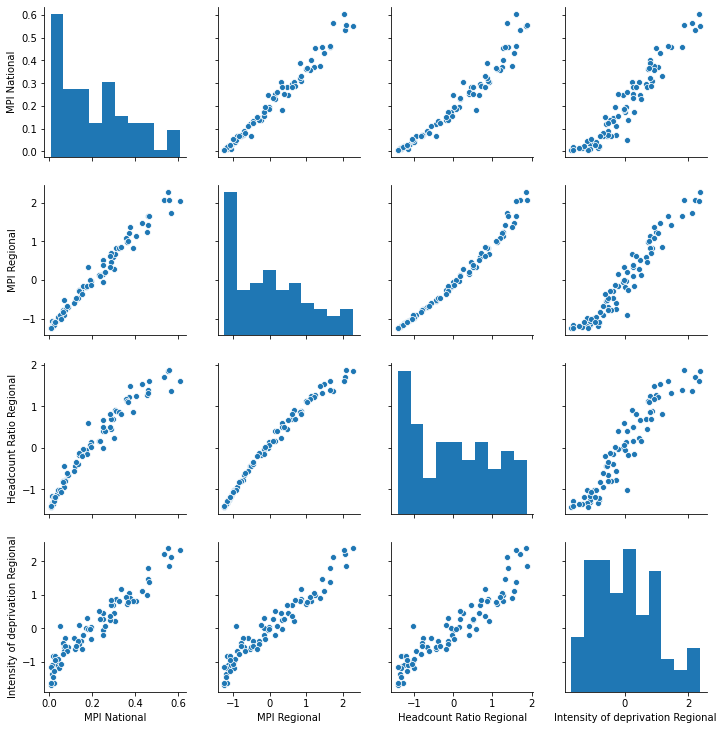

In [ ]:
sns.pairplot(df2.iloc[:,:4])

From above pairplot we can see *linear* relationship exists between **MPI National** and **MPI_Regional**, but the relationship between **MPI_National** and **Headcount Ratio
Regional** and also **Intensity of deprivation Regional** are somewhat *non-linear* as abserved from the above scatterplots. So the linearity assumption is violated.

In [ ]:
df2.columns=df2.columns.str.replace(' ','_').str.replace('-','_')

In [ ]:
df3=df2.copy()

In [ ]:
df2.columns

Index(['MPI_National', 'MPI_Regional', 'Headcount_Ratio_Regional',
       'Intensity_of_deprivation_Regional', 'Arab_States',
       'East_Asia_and_the_Pacific', 'Europe_and_Central_Asia',
       'Latin_America_and_Caribbean', 'South_Asia', 'Sub_Saharan_Africa'],
      dtype='object')

In [ ]:
import statsmodels.formula.api as smf
model=smf.ols(formula='MPI_National~MPI_Regional+Headcount_Ratio_Regional+Intensity_of_deprivation_Regional+Arab_States+East_Asia_and_the_Pacific+Europe_and_Central_Asia+Latin_America_and_Caribbean+South_Asia+Sub_Saharan_Africa',data=df2).fit()
#mod=model.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           MPI_National   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     468.4
Date:                Sat, 22 Aug 2020   Prob (F-statistic):           5.74e-57
Time:                        16:22:45   Log-Likelihood:                 186.23
No. Observations:                  78   AIC:                            -354.5
Df Residuals:                      69   BIC:                            -333.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

As evident from the last line there might be multicollinearity present. We will use **Variation Inflation Factor(VIF)** to check **multicollinearity** in data.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=df2.drop('MPI_National',axis=1)
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['Features']=variables.columns
vif

,VIF,Features
0,108.649110,MPI_Regional
1,67.401325,Headcount_Ratio_Regional
2,20.895897,Intensity_of_deprivation_Regional
3,1.136620,Arab_States
4,1.186652,East_Asia_and_the_Pacific
5,1.175380,Europe_and_Central_Asia
6,1.543566,Latin_America_and_Caribbean
7,1.060012,South_Asia
8,1.703329,Sub_Saharan_Africa


**VIF** value ranges from 1 to infinity. VIF greater than **5** is very high and proves high multicollinearity among features. Sometimes **10** is considered as threshold. It depends on the task and data.

Here clearly there are high multicollinearity between the first 3 features evident from the VIF value of them.

So multicollinearity assumption is violated.

In the below test we will test homoscedasticity property using **Breusch-Pagan Test**.

The null hypothesis assumes equal variance(homoscedasticity).

In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan
_,p_val,_,f_p_val = het_breuschpagan(model.resid, df2.drop('MPI_National',axis=1))
print('p value: ',p_val)
print('f p value: ',f_p_val)

p value:  0.0054539487525933576
f p value:  0.002815182814034224


Generally we check the first p-value. But it's always good to check both the p-values. Both are below 0.05 so we reject the null hypothesis. So there is **heteroscedasticity** in the error terms violating the assumption.

0.9537446136352276

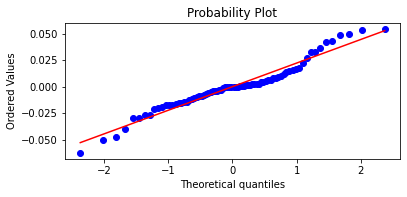

In [ ]:
import scipy as sp
fig, ax = plt.subplots(figsize=(6,2.5))
_,(__, ___, r) = sp.stats.probplot(model.resid, plot=ax, fit=True)
r**2

The **good fit** indicates that normality is a reasonable approximation. Also the **r-squared** is high indicating good fit. So residuals are more or less normal



So due to **multicollinearity and non-linearity and homoscedasticity** properties violated, we cannot use Linear Model in this data.

In [ ]:
df_c=df2.copy()
#df_c.columns=df_c.columns.str.replace(' ','_')

Since Linear Models are not not suitable for this dataset we will use tree-based ML model. We decided to use **Random Forest Model**. A Random Forest Model is an ensemble of several decision trees where final prediction is obtained by averaging or max-voting all the predictions. 

A Decision Tree devides a dataset into a number of partitions in each node using a set of questions(if-else). The final prediction is obtained from the last layer of nodes. In case of Regression, the splitting decision is based on minimizing **RSS(Residual Sum of Errors)**.

Random Forest is very robust model. It's advantages include:

1. It is not affected by problem of multicollinearity, outliers etc.

2. It is not as retrictive as linear models.

3. It can take care of misssing values.

4. It can be used for both regression and classification task.

5. It gives the relative importance of each features in prediction.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
X=df3.select_dtypes(['float','uint8']).drop('MPI_National',axis=1)
y=df3['MPI_National']

In [ ]:
# Fitting and Prediction of Model
rf=RandomForestRegressor()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.23,random_state=111)
rf.fit(X_train,y_train)
pred=rf.predict(X_test)
error=mean_squared_error(y_test,pred)
print('Mean Squared Error: ',error)

Mean Squared Error:  0.0008438580888888944


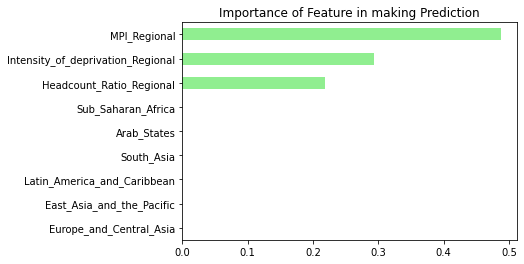

In [ ]:
# Plotting the relative importance of features
importance_rf=pd.Series(rf.feature_importances_,index=X.columns)
sorted_imp=importance_rf.sort_values()
sorted_imp.plot(kind='barh',color='lightgreen')
t=plt.title('Importance of Feature in making Prediction')

So we can see that **MPI_Regional** has the largest contribution in the model towards predicting the target variable followed by **Headcount_Ratio_Regional** and **Intensity_of_deprivation_Regional**.

The world region don't have contribution towards prediction.

# Final Conclusion:

1. The countries like **Niger, Ethiopia and South Sudan** are most poverty-striken nation followed by others.

2. Countries like **Jordan, Jamaica, Uzbekistan** are less poverty-striken followed by others.

3. **Sub-Saharan Africa** region is most poverty-striken followed by others. **Europe and Central Asia** have least poverty.

4. **East Asia** and the **Pacific & Arab States** have similar poverty-index distribution. So the same poverty-eradication scheme/policy can be applied to the two regions.

5. There is a high relation between the different features/variables of the data. So the value of one variable of a region gives an good idea of value of other variable/feature.

6. **MPI Regional**, **Headcount Ratio Regional**, **Intensity of Derpivation Regional** have the most contribution in the calculation of MPI index of a nation respectively.

In [ ]:
!jupyter nbconvert Udacity_Project_5.ipynb --to slides --post serve

[NbConvertApp] Converting notebook Udacity_Project_5.ipynb to slides
[NbConvertApp] Writing 1008668 bytes to Udacity_Project_5.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Udacity_Project_5.slides.html
Use Control-C to stop this server
[NbConvertApp] WARNING | No web browser found: could not locate runnable browser.

Interrupted
^C
